<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/Assignment7_clustering(crime)__Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. K MEANS METHODS

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pylab as plt
from	sklearn.cluster	import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [2]:
# Kmeans on crime Data set 
data = pd.read_csv("/content/crime_data.csv")

In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

In [4]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1:])
df_norm.head(5)  # Top 5 rows

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


###### screw plot or elbow curve ############

In [5]:
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

([<matplotlib.axis.XTick at 0x7fdcec0de850>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

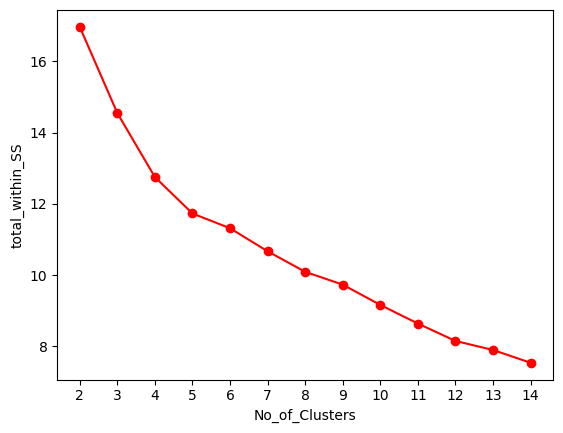

In [6]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [7]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [8]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
df_norm.head()
model.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 3, 3, 4, 3, 3, 2, 4, 3, 0, 2, 1, 3, 4, 1, 4, 4, 0, 1, 3, 2, 3,
       1, 0, 4, 4, 4, 3, 1, 2, 3, 3, 0, 1, 2, 4, 4, 2, 2, 0, 1, 0, 3, 2,
       1, 4, 2, 1, 1, 4], dtype=int32)

In [9]:
data['clusters']=model.labels_
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,3


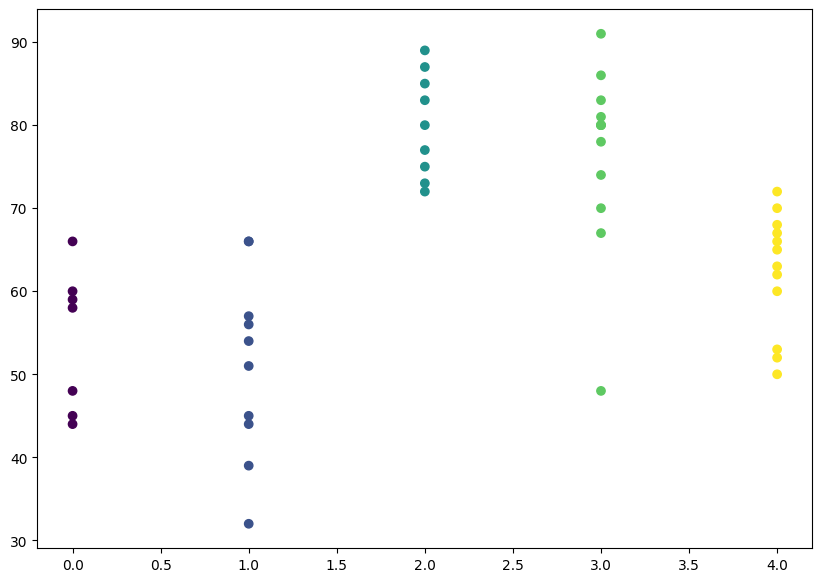

In [10]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['clusters'],data['UrbanPop'], c=model.labels_)

In [11]:
# creating a csv file
data.to_csv("crime.csv",encoding="utf-8")

2. HIERARCHIAL CLUSTERING

In [12]:
#IMPORT LIBRARIES
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage 

In [13]:
# As we already have normalized data

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

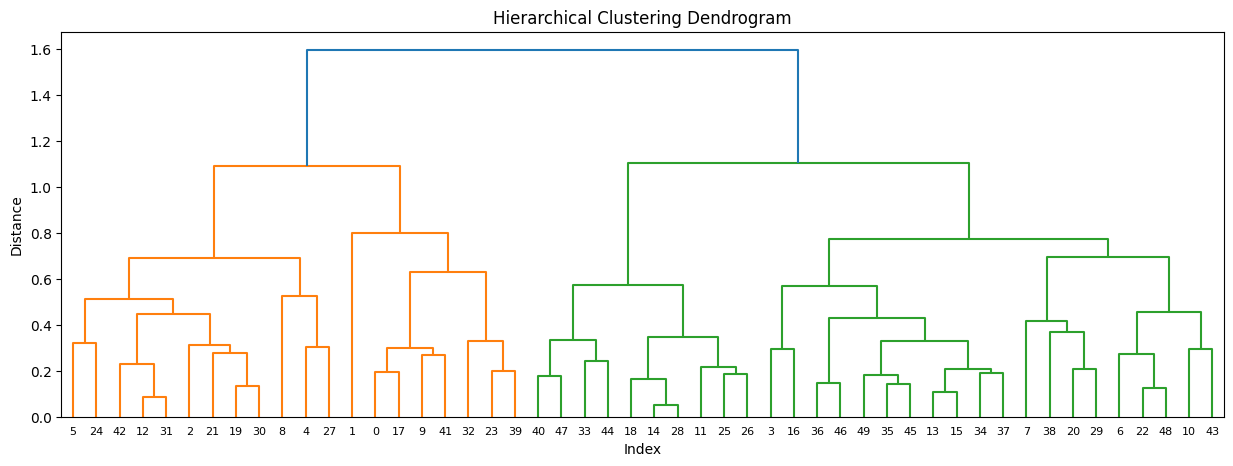

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [14]:
# Create Dendrograms
help(linkage)
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
help(linkage)

In [15]:
# Now applying AgglomerativeClustering choosing 4 as clusters from the dendrogram
hc=AgglomerativeClustering(n_clusters=4,linkage='complete',affinity = "euclidean").fit(df_norm)
y=pd.DataFrame(hc.fit_predict(df_norm),columns=['clustersid'])
y['clustersid'].value_counts()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


1    20
3    12
2    10
0     8
Name: clustersid, dtype: int64

In [16]:
# Adding clusters to dataset
data['clustersid']=hc.labels_
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters,clustersid
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,3,0
2,Arizona,8.1,294,80,31.0,3,3
3,Arkansas,8.8,190,50,19.5,4,1
4,California,9.0,276,91,40.6,3,3


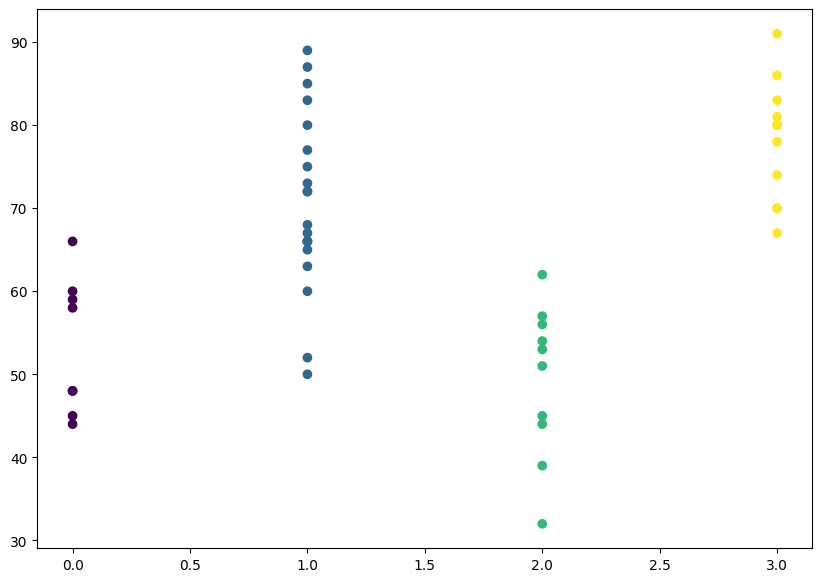

In [17]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['clustersid'],data['UrbanPop'], c=hc.labels_)

3. DBSCAN

In [18]:
#Import libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [24]:
data1

,Murder,Assault,UrbanPop,Rape,clusters,clustersid
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,0,0
2,8.1,294,80,31.0,0,3
3,8.8,190,50,19.5,0,1
4,9.0,276,91,40.6,0,3


In [27]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(data)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.        ,
        -1.48365074],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  0.        ,
        -1.48365074],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.        ,
         1.4446073 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.        ,
        -0.50756473],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  0.        ,
         1.4446073 ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.        ,
         1.4446073 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  0.        ,
        -0.50756473],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.        ,
        -0.50756473],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  0.        ,
         1.4446073 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.        ,
        -1.48365074],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [28]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [30]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  2, -1,  1,  2,  1, -1,
        0,  2, -1,  1, -1,  1, -1, -1,  2,  2, -1,  2,  1, -1, -1, -1,  2,
        1,  1,  1,  1,  1,  0,  2,  0, -1,  1,  2,  1,  1,  2,  1,  1])

In [31]:
# Adding clusters to dataset
data['clusters']=dbscan.labels_
data

,Murder,Assault,UrbanPop,Rape,clusters,clustersid
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,-1,0
2,8.1,294,80,31.0,-1,3
3,8.8,190,50,19.5,-1,1
4,9.0,276,91,40.6,-1,3
5,7.9,204,78,38.7,-1,3
6,3.3,110,77,11.1,1,1
7,5.9,238,72,15.8,-1,1
8,15.4,335,80,31.9,-1,3
9,17.4,211,60,25.8,-1,0


In [33]:
data.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape,clustersid
,,mean,mean,mean,mean,mean
0,-1,10.8400,236.8000,69.7000,28.1150,2.0
1,0,14.0500,238.0000,57.7500,23.2000,0.0
2,1,5.2875,128.9375,72.4375,18.1375,1.0
3,2,3.1800,78.7000,49.3000,11.6300,2.0


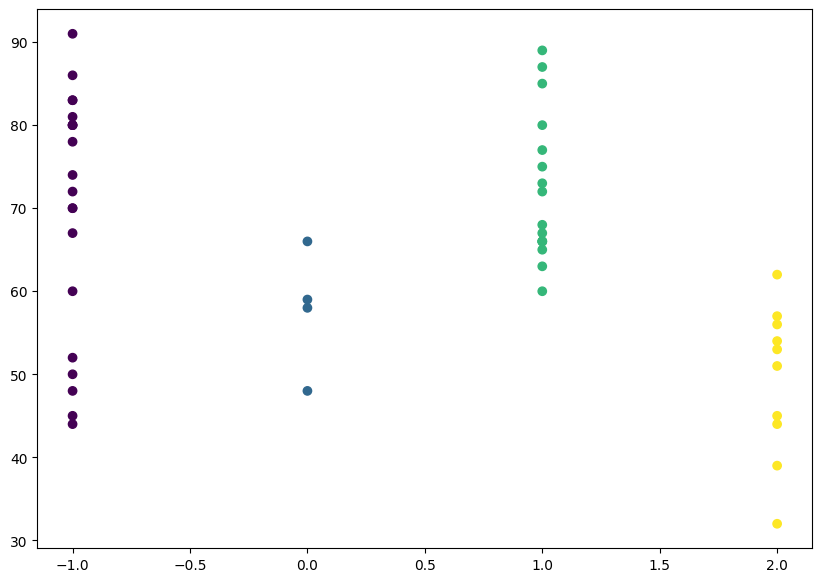

In [34]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['clusters'],data['UrbanPop'], c=dbscan.labels_)